In [1]:
memDiv <- 1024^2
timeDiv <- 60
ro <- 2

threads <- c(4,8,12,16,20,24,32)
j <- seq(3)


### Piscem

In [2]:
method <- "alevin-fry-atac"

#### 10K PBMC

In [3]:
data_dir <- "../../../analysis/piscem_timing/map_output/10k_pbmc_ATACv2_nextgem_Chromium_Controller_fastqs/k25_m_17//bin-size=1000_thr=0.7_orp=false"
map_files <- lapply(threads, function(thread) file.path(data_dir, paste("time_align_threads=", thread, "_", j, ".out", sep="")))
dataset <- "10K PBMC"
timeAlignP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[4]]))
                                                })
memAlignP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[5]]))
                                                })

map_files <- lapply(threads, function(thread) file.path(data_dir, paste("time_sort_threads=", thread, "_", j, ".out", sep="")))
timeSortP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[4]]))
                                                })
memSortP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[5]]))
                                                })

map_files <- lapply(threads, function(thread) file.path(data_dir, paste("time_genpm_threads=", thread, "_", j, ".out", sep="")))
timeWhP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[4]]))
                                                })
memWhP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[5]]))
                                                })

In [4]:
memP <- round(sapply(seq_along(threads), function(i) max(c(memSortP[i], memAlignP[i], memWhP[i])))/memDiv,ro)
timeP <- round(sapply(seq_along(threads), function(i) sum(c(timeSortP[i], timeAlignP[i], timeWhP[i])))/timeDiv,ro)

dfMem <- data.frame(Memory = memP, Threads = threads, Method = method, Dataset = dataset)
dfTime <- data.frame(Time = timeP, Threads = threads, Method = method, Dataset = dataset)

dfMemAlign <- data.frame(Memory = round(memAlignP/memDiv, ro), Threads = threads, Method = method, Dataset = dataset)
dfTimeAlign <- data.frame(Time = round(timeAlignP/timeDiv, ro), Threads = threads, Method = method, Dataset = dataset)

#### 8K Cortex

In [5]:
data_dir <- "../../../analysis/piscem_timing/map_output/8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller_fastqs/k25_m_17//bin-size=1000_thr=0.7_orp=false"
dataset <- "8K Cortex"
map_files <- lapply(threads, function(thread) file.path(data_dir, paste("time_align_threads=", thread, "_", j, ".out", sep="")))
timeAlignP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[4]]))
                                                })
memAlignP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[5]]))
                                                })

map_files <- lapply(threads, function(thread) file.path(data_dir, paste("time_sort_threads=", thread, "_", j, ".out", sep="")))
timeSortP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[4]]))
                                                })
memSortP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[5]]))
                                                })

map_files <- lapply(threads, function(thread) file.path(data_dir, paste("time_genpm_threads=", thread, "_", j, ".out", sep="")))
timeWhP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[4]]))
                                                })
memWhP <- sapply(map_files, function(fileTs) {
    mean(sapply(fileTs, function(file) rjson::fromJSON(file = file)[[5]]))
                                                })

In [6]:
memP <- round(sapply(seq_along(threads), function(i) max(c(memSortP[i], memAlignP[i], memWhP[i])))/memDiv,ro)
timeP <- round(sapply(seq_along(threads), function(i) sum(c(timeSortP[i], timeAlignP[i], timeWhP[i])))/timeDiv,ro)

dfMem <- rbind(dfMem, data.frame(Memory = memP, Threads = threads, Method = method, Dataset = dataset))
dfTime <- rbind(dfTime, data.frame(Time = timeP, Threads = threads, Method = method, Dataset = dataset))

dfMemAlign <- rbind(dfMemAlign, data.frame(Memory = round(memAlignP/memDiv, ro), Threads = threads, Method = method, Dataset = dataset))
dfTimeAlign <- rbind(dfTimeAlign, data.frame(Time = round(timeAlignP/timeDiv, ro), Threads = threads, Method = method, Dataset = dataset))

### Chromap

In [7]:
method <- "Chromap"

#### 10K PBMC

In [8]:
dataset <- "10K PBMC"
timeC <- c(mean(c(51*60+14.49, 51*60+11.89, 51*60+10.32)), 
                mean(c(29*60+47.50, 29*60+56.50, 30*60+32.39)),
                mean(c(27*60+24.35, 27*60+25.04, 27*60+13.36)),
                mean(c(28*60+19.87, 28*60+9.26, 27*60+51.29)),
                mean(c(29*60+1.51, 27*60+42.55, 27*60+15.90)),
                mean(c(27*60+14.44, 26*60+51.75, 26*60+53.75)),
                mean(c(29*60+23.80, 26*60+25.27, 26*60+31.04))
          )
timeC <- round(timeC/timeDiv, ro)

memC <- c(mean(c(20283328, 20447116, 20326164)),
          mean(c(20456704, 20356264, 20575260)),
          mean(c(20399380, 20379116, 20423236)),
          mean(c(20495092, 20398148, 20627700)),
          mean(c(20584060, 20574328, 20549968)),
          mean(c(20562796, 20591728, 20552664)),
          mean(c(20598756, 20640568, 20569260))
          )
memC <- round(memC/memDiv, ro)

timeDeDupC <- c(mean(c(213.28, 218.91, 217.17)),
                mean(c(213.62, 203.39, 214.97)),
                mean(c(213.23, 211.05, 205.02)),
                mean(c(209.67, 205.55, 205.57)),
                mean(c(238.40, 221.31, 215.44)),
                mean(c(205.12, 204.96, 203.71)),
                mean(c(230.04, 207.97, 216.21))
               )
timeDeDupC <- round(timeDeDupC/timeDiv, ro)
timeAlignC <- timeC - timeDeDupC

In [9]:
dfMem <- rbind(dfMem, data.frame(Memory = memC, Threads = threads, Method = method, Dataset = dataset))
dfTime <- rbind(dfTime, data.frame(Time = timeC, Threads = threads, Method = method, Dataset = dataset))

dfMemAlign <- rbind(dfMemAlign, data.frame(Memory = memC, Threads = threads, Method = method, Dataset = dataset))
dfTimeAlign <- rbind(dfTimeAlign, data.frame(Time = timeAlignC, Threads = threads, Method = method, Dataset = dataset))

#### 8k Cortex

In [10]:
dataset <- "8K Cortex"
timeC <- c(
    mean(c(38*60+47.98, 38*60+55.31, 40*60+37.77)),
    mean(c(25*60+29.76, 25*60+19.07, 25*60+31.81)),
    mean(c(24*60+00.26, 22*60+27.06, 22*60+16.17)),
    mean(c(22*60+59.67, 23*60+4.70, 23*60+7.57)),
    mean(c(22*60+22.91, 22*60+25.94, 22*60+17.01)),
    mean(c(22*60+27.06, 22*60+23.18, 22*60+9.47)),
    mean(c(21*60+54.20, 21*60+54.82, 21*60+44.02))
)
timeC <- round(timeC/timeDiv, ro)

timeDedupC <- c(
    mean(c(166.96, 171.83, 190.31)),
    mean(c(164.78, 172.40, 165.74)),
    mean(c(163.73, 163.74, 165.10)),
    mean(c(166.87, 169.36, 169.04)),
    mean(c(160.640, 162.99, 165.87)),
    mean(c(171.45, 167.97, 165.59)),
    mean(c(168.41, 170.01, 164.08))
)
timeDedupC <- round(timeDedupC/timeDiv, ro)

memC <- c(
    mean(c(19436728, 19295268, 19477888)),
    mean(c(19633192, 19471840, 19657592)),
    mean(c(19338268, 19459840, 19464736)),
    mean(c(19555264, 19661048, 19335472)),
    mean(c(19584284, 19841500, 19502456)),
    mean(c(19597316, 19644956, 19570288)),
    mean(c(19616668, 19692084, 19833048))
)
memC <- round(memC/memDiv, ro)
timeAlignC <- timeC - timeDeDupC

dfMem <- rbind(dfMem, data.frame(Memory = memC, Threads = threads, Method = method, Dataset = dataset))
dfTime <- rbind(dfTime, data.frame(Time = timeC, Threads = threads, Method = method, Dataset = dataset))

dfMemAlign <- rbind(dfMemAlign, data.frame(Memory = memC, Threads = threads, Method = method, Dataset = dataset))
dfTimeAlign <- rbind(dfTimeAlign, data.frame(Time = timeAlignC, Threads = threads, Method = method, Dataset = dataset))

In [11]:
timeC
timeDedupC
timeAlignC

[1] 39.45 25.45 22.91 23.07 22.37 22.33 21.85

[1] 2.94 2.79 2.74 2.81 2.72 2.81 2.79

[1] 35.84 21.94 19.41 19.62 18.62 18.92 18.22

### Chromap (Map Only)

In [12]:
method <- "Chromap (Map Only)"

#### 10K PBMC

In [13]:
dataset <- "10K PBMC"

In [14]:
timeAlignCh <- c(
    mean(c(52*60+13.98, 51*60+16.67, 51*60+18.77)),
    mean(c(29*60+3.08, 28*60+44.27, 28*60+23.43)),
    mean(c(28*60+18.48, 26*60+53.34, 27*60+7.01)),
    mean(c(29*60+2.73, 28*60+4.01, 28*60+6.98)),
    mean(c(27*60+1.87, 26*60+41.69, 26*60+32.57)),
    mean(c(27*60+26.06, 26*60+47.66, 27*60+1.95)),
    mean(c(27*60+11.36, 25*60+36.20, 25*60+34.94))
)
round(timeAlignC/60,ro)

[1] 0.60 0.37 0.32 0.33 0.31 0.32 0.30

In [15]:
timeAlignCh <- c(
    mean(c(52*60+13.98, 51*60+16.67, 51*60+18.77)),
    mean(c(29*60+3.08, 28*60+44.27, 28*60+23.43)),
    mean(c(28*60+18.48, 26*60+53.34, 27*60+7.01)),
    mean(c(29*60+2.73, 28*60+4.01, 28*60+6.98)),
    mean(c(27*60+1.87, 26*60+41.69, 26*60+32.57)),
    mean(c(27*60+26.06, 26*60+47.66, 27*60+1.95)),
    mean(c(27*60+11.36, 25*60+36.20, 25*60+34.94))
)
timeAlignCh <- round(timeAlignCh/timeDiv, ro)

memCh <- c(
    mean(c(40313280, 40270460, 40216692)),
    mean(c(42032568, 41213528, 40381080)),
    mean(c(40322780, 41272112, 42444516)),
    mean(c(40491128, 40469216, 41228168)),
    mean(c(40567520, 40520384, 40425964)),
    mean(c(40495000, 40459632, 42275500)),
    mean(c(41199484, 40652784, 41723852))
)
memCh <- round(memCh/memDiv, ro)

dfMemAlign <- rbind(dfMemAlign, data.frame(Memory = memCh, Threads = threads, Method = method, Dataset = dataset))
dfTimeAlign <- rbind(dfTimeAlign, data.frame(Time = timeAlignCh, Threads = threads, Method = method, Dataset = dataset))

#### 8K Cortex

In [16]:
dataset <- "8K Cortex"

In [17]:
timeAlignCh <- c(
    mean(c(38*60+5.57, 37*60+17.36, 37*60+01.22)),
    mean(c(25*60+11.79, 24*60+1.85, 24*60+31.31)),
    mean(c(22*60+00.13, 21*60+42.84, 22*60+7.99)),
    mean(c(23*60+55.34, 23*60+39.22, 23*60+40.76)),
    mean(c(22*60+15.86, 21*60+59.89, 22*60+10.92)),
    mean(c(22*60+27.28, 22*60+09.71, 22*60+3.57)),
    mean(c(21*60+40.50, 21*60+20.57, 21*60+32.22))
)
timeAlignCh <- round(timeAlignCh/timeDiv, ro)

memCh <- c(
    mean(c(36494392, 35453340, 36983948)),
    mean(c(35658648, 35803160, 35565372)),
    mean(c(35560308, 36008624, 35501868)),
    mean(c(35761356, 36676828, 36402388)),
    mean(c(35699516, 36019796, 35618524)),
    mean(c(38059992, 35699000, 36298072)),
    mean(c(35884040, 37158740, 35751020))
)
memCh <- round(memCh/memDiv, ro)

dfMemAlign <- rbind(dfMemAlign, data.frame(Memory = memCh, Threads = threads, Method = method, Dataset = dataset))
dfTimeAlign <- rbind(dfTimeAlign, data.frame(Time = timeAlignCh, Threads = threads, Method = method, Dataset = dataset))

In [18]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggpubr))
size <- 20


### End-to-end

#### 10K PBMC

In [19]:
options(repr.plot.width=14, repr.plot.height=11)
p10KTimings <- dfTime %>% filter(Dataset == "10K PBMC") %>%
    ggplot(aes(Threads, Time, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Time taken across different threads for Human 10K\n PBMC dataset", 
        x = "Number of threads", y = "Time(minutes)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )

p10KMemory <- dfMem %>% filter(Dataset == "10K PBMC") %>%
    ggplot(aes(Threads, Memory, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Maximum resident memory consumed across \n different threads for Human 10K PBMC dataset", 
        x = "Number of threads", y = "Memory(Gb)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [20]:
options(repr.plot.width=16, repr.plot.height=8)
p10KEntire <- ggarrange(p10KTimings, p10KMemory, common.legend = T, 
          legend = "bottom", labels = c("A)", "B)"), font.label = list(size=size))
ggsave(p10KEntire, filename = "images/p10KEntire.pdf", dpi = 600, width = 16, height = 8)

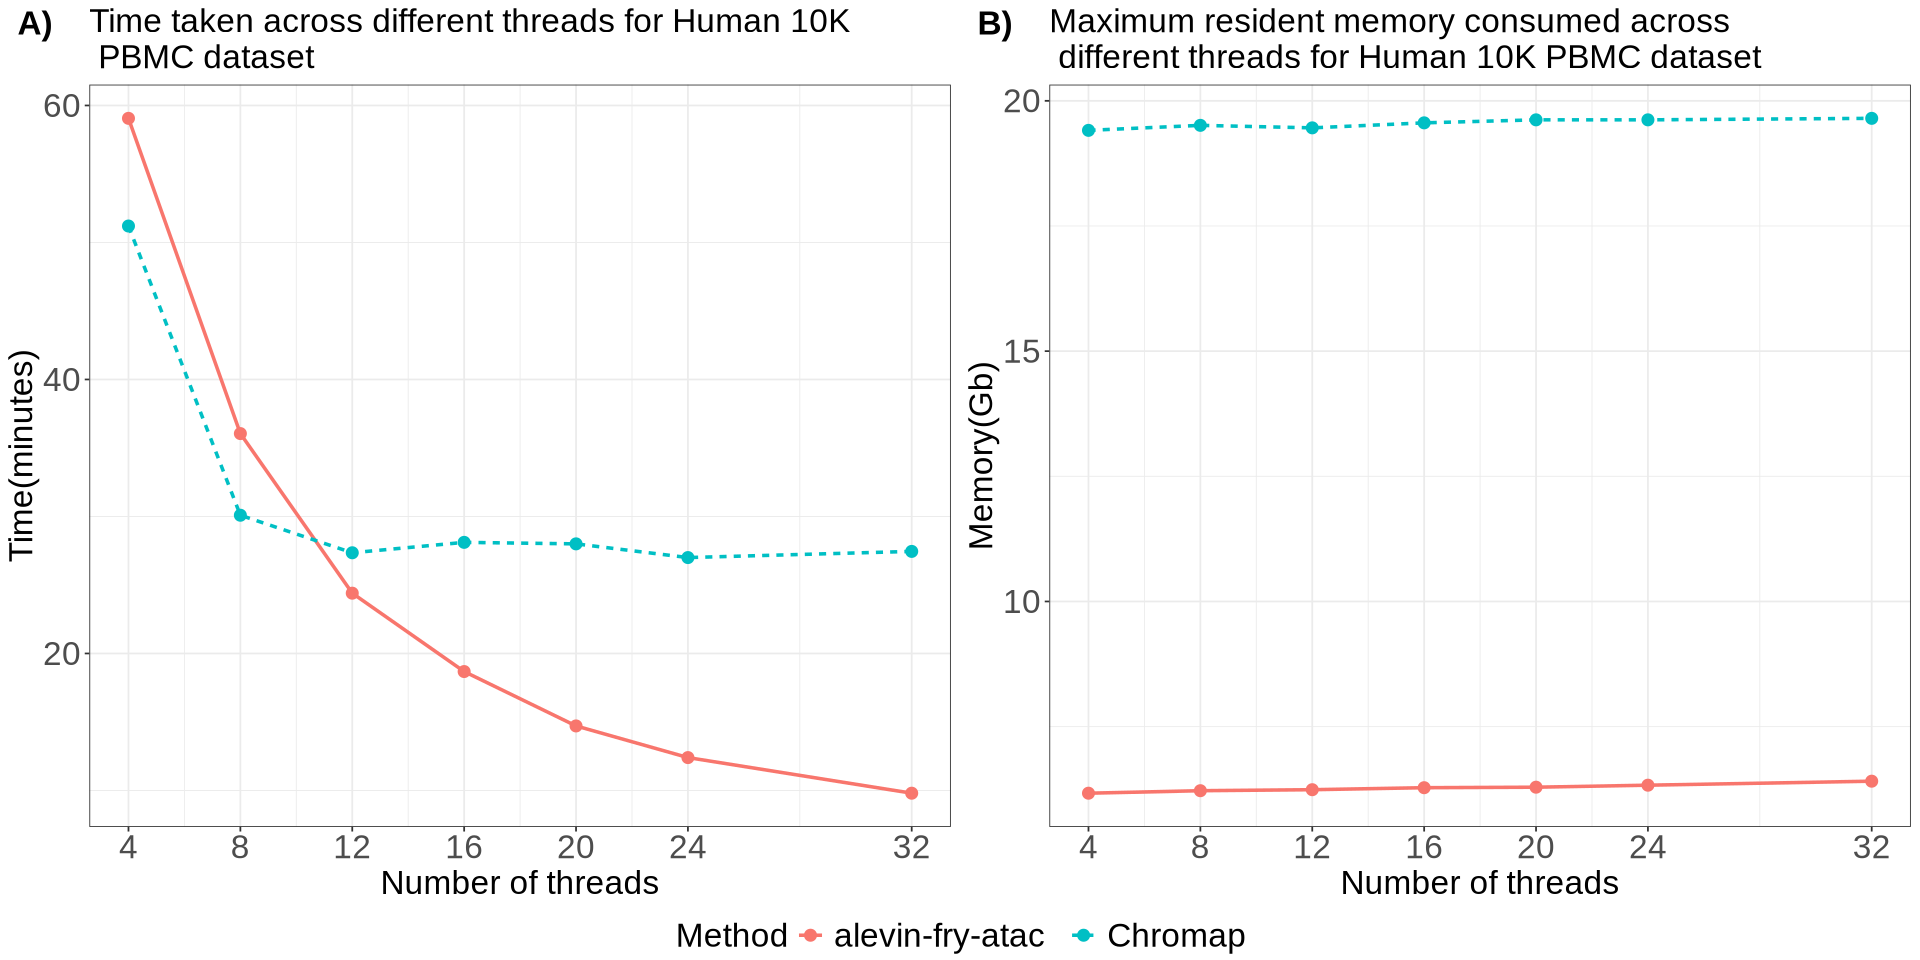

In [21]:
p10KEntire

In [22]:
options(repr.plot.width=14, repr.plot.height=11)
p8KTimings <- dfTime %>% filter(Dataset == "8K Cortex") %>%
    ggplot(aes(Threads, Time, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Time taken across different threads for Mouse 8K\n Cortex dataset", 
        x = "Number of threads", y = "Time(minutes)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )

p8KMemory <- dfMem %>% filter(Dataset == "8K Cortex") %>%
    ggplot(aes(Threads, Memory, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Maximum resident memory consumed across \n different threads for Mouse 8K Cortex dataset", 
        x = "Number of threads", y = "Memory(Gb)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )

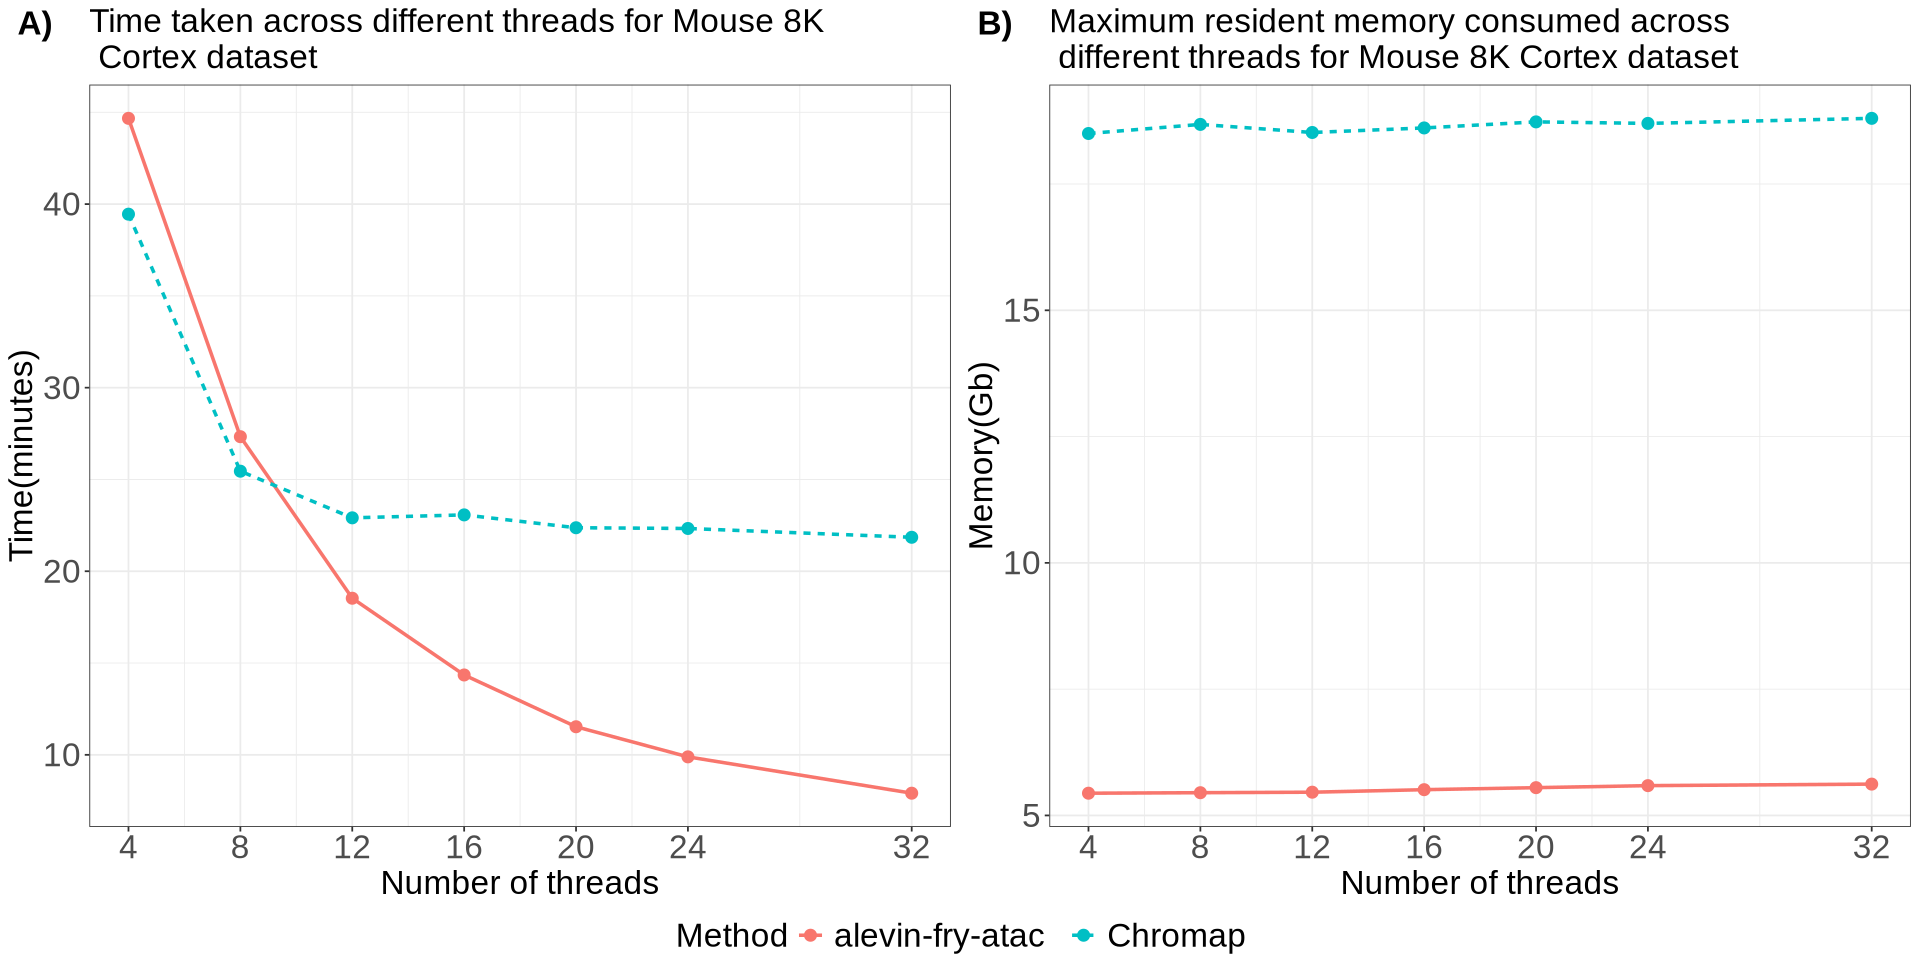

In [23]:
options(repr.plot.width=16, repr.plot.height=8)
p8KEntire <- ggarrange(p8KTimings, p8KMemory, common.legend = T, 
          legend = "bottom", labels = c("A)", "B)"), font.label = list(size=size))
ggsave(p8KEntire, filename = "images/p8KEntire.pdf", dpi = 600, width = 16, height = 8)
p8KEntire

### Map Only

#### 10K PBMC

In [24]:
options(repr.plot.width=14, repr.plot.height=11)
p10KTimings <- dfTimeAlign %>% filter(Dataset == "10K PBMC") %>%
    ggplot(aes(Threads, Time, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Time taken across different threads for Human\n 10K PBMC dataset", 
        x = "Number of threads", y = "Time(minutes)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )

p10KMemory <- dfMemAlign %>% filter(Dataset == "10K PBMC") %>%
    ggplot(aes(Threads, Memory, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Maximum resident memory consumed across \n different threads for Human 10K PBMC dataset", 
        x = "Number of threads", y = "Memory(Gb)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )


In [25]:
options(repr.plot.width=16, repr.plot.height=8)
p10KMO <- ggarrange(p10KTimings, p10KMemory, common.legend = T, 
          legend = "bottom", labels = c("A)", "B)"), font.label = list(size=size))
ggsave(p10KMO, filename = "images/p10KMO.pdf", dpi = 600, width = 16, height = 8)

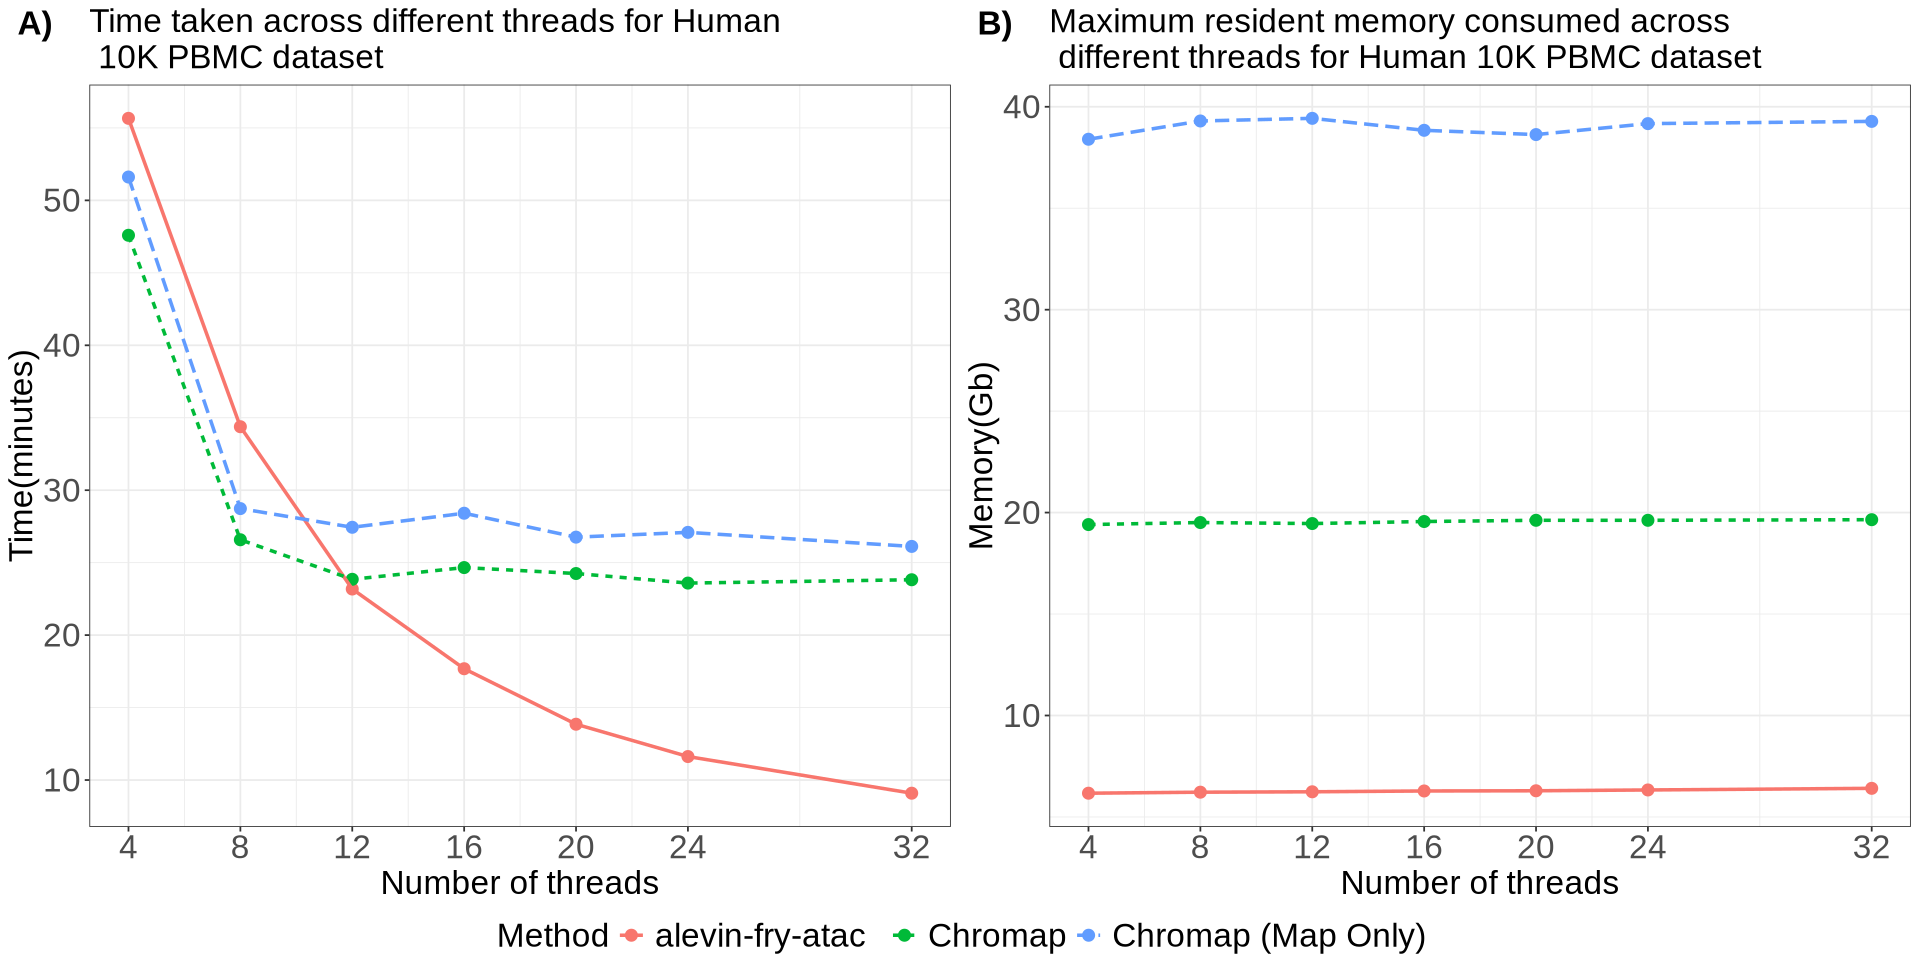

In [26]:
p10KMO

#### 8K PBMC

In [27]:
options(repr.plot.width=14, repr.plot.height=11)
p8KTimings <- dfTimeAlign %>% filter(Dataset == "8K Cortex") %>%
    ggplot(aes(Threads, Time, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Time taken across different threads for Mouse 8K\n Cortex dataset", 
        x = "Number of threads", y = "Time(minutes)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )

p8KMemory <- dfMemAlign %>% filter(Dataset == "8K Cortex") %>%
    ggplot(aes(Threads, Memory, group = Method)) +
    geom_point(size=3,aes(color=factor(Method))) +
    geom_line(size=1, aes(color=factor(Method), linetype=factor(Method))) +
    theme_bw() + scale_x_continuous(breaks = c(4, 8, 12, 16, 20, 24, 32)) +
    labs(title = "Maximum resident memory consumed across \n different threads for Mouse 8K Cortex dataset", 
        x = "Number of threads", y = "Memory(Gb)", color = "Method", linetype = "Method") +
  theme(
    plot.title = element_text(size = size),           # Title font size
    axis.title.x = element_text(size = size),         # X-axis label font size
    axis.title.y = element_text(size = size),         # Y-axis label font size
    axis.text = element_text(size = size),            # Tick mark font size
    legend.title = element_text(size = size),         # Legend title font size
    legend.text = element_text(size = size)           # Legend text font size
  )


In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
p8KMO <- ggarrange(p8KTimings, p8KMemory, common.legend = T, 
          legend = "bottom", labels = c("A)", "B)"), font.label = list(size=size))
ggsave(p8KMO, filename = "images/p8KMO.pdf", dpi = 600, width = 16, height = 8)

In [29]:
dfTime

Time,Threads,Method,Dataset
<dbl>,<dbl>,<chr>,<chr>
59.06,4,alevin-fry-atac,10K PBMC
36.05,8,alevin-fry-atac,10K PBMC
24.40,12,alevin-fry-atac,10K PBMC
18.68,16,alevin-fry-atac,10K PBMC
14.71,20,alevin-fry-atac,10K PBMC
12.40,24,alevin-fry-atac,10K PBMC
9.80,32,alevin-fry-atac,10K PBMC
44.67,4,alevin-fry-atac,8K Cortex
27.33,8,alevin-fry-atac,8K Cortex


In [30]:
dfTimeAlign

Time,Threads,Method,Dataset
<dbl>,<dbl>,<chr>,<chr>
55.66,4,alevin-fry-atac,10K PBMC
34.38,8,alevin-fry-atac,10K PBMC
23.18,12,alevin-fry-atac,10K PBMC
17.68,16,alevin-fry-atac,10K PBMC
13.85,20,alevin-fry-atac,10K PBMC
11.62,24,alevin-fry-atac,10K PBMC
9.09,32,alevin-fry-atac,10K PBMC
41.77,4,alevin-fry-atac,8K Cortex
25.61,8,alevin-fry-atac,8K Cortex


In [31]:
dfMem

Memory,Threads,Method,Dataset
<dbl>,<dbl>,<chr>,<chr>
6.17,4,alevin-fry-atac,10K PBMC
6.22,8,alevin-fry-atac,10K PBMC
6.24,12,alevin-fry-atac,10K PBMC
6.28,16,alevin-fry-atac,10K PBMC
6.29,20,alevin-fry-atac,10K PBMC
6.33,24,alevin-fry-atac,10K PBMC
6.41,32,alevin-fry-atac,10K PBMC
5.44,4,alevin-fry-atac,8K Cortex
5.45,8,alevin-fry-atac,8K Cortex


In [32]:
dfMemAlign

Memory,Threads,Method,Dataset
<dbl>,<dbl>,<chr>,<chr>
6.17,4,alevin-fry-atac,10K PBMC
6.22,8,alevin-fry-atac,10K PBMC
6.24,12,alevin-fry-atac,10K PBMC
6.28,16,alevin-fry-atac,10K PBMC
6.29,20,alevin-fry-atac,10K PBMC
6.33,24,alevin-fry-atac,10K PBMC
6.41,32,alevin-fry-atac,10K PBMC
5.44,4,alevin-fry-atac,8K Cortex
5.45,8,alevin-fry-atac,8K Cortex
